# TASK 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(R'C:\Users\Sanya srivastava\Desktop\Data project\twitter_datasets.csv')

In [3]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
df.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [7]:
column_names=['ID','Entity','Sentiments','Remarks']
new_df=pd.read_csv(R'C:\Users\Sanya srivastava\Desktop\Data project\twitter_datasets.csv',names=column_names)
new_df

,ID,Entity,Sentiments,Remarks
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
new_df.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [9]:
new_df.isnull().sum()

ID              0
Entity          0
Sentiments      0
Remarks       686
dtype: int64

In [10]:
new_df = new_df.dropna()

In [11]:
new_df.isnull().sum()

ID            0
Entity        0
Sentiments    0
Remarks       0
dtype: int64

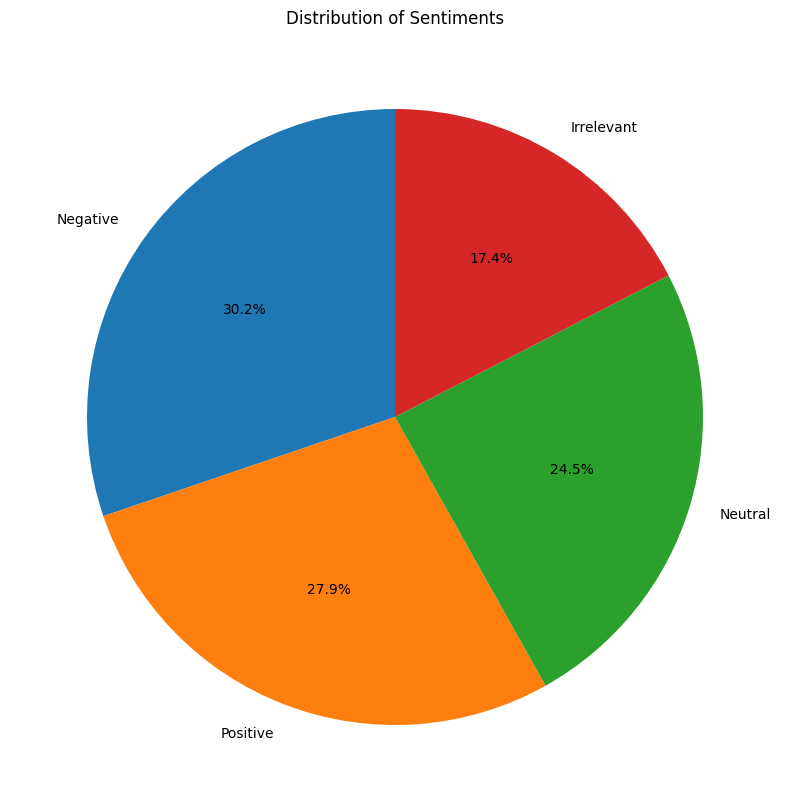

In [12]:
df_sentiment = new_df['Sentiments'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(df_sentiment, labels=df_sentiment.index, autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Sentiments')
plt.show()

In [13]:
df_entity=new_df['Entity'].value_counts()
df_entity

Entity
LeagueOfLegends                      2377
MaddenNFL                            2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
johnson&johnson                      2324
FIFA                                 2324
TomClancysGhostRecon                 2321
Overwatch                            2316
Battlefield                          2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                

In [14]:
top5_entitycounts=new_df['Entity'].value_counts().sort_values(ascending=False)[:5]
top5_entitycounts
     

Entity
LeagueOfLegends         2377
MaddenNFL               2377
CallOfDuty              2376
Verizon                 2365
TomClancysRainbowSix    2364
Name: count, dtype: int64

<Figure size 2000x1600 with 0 Axes>

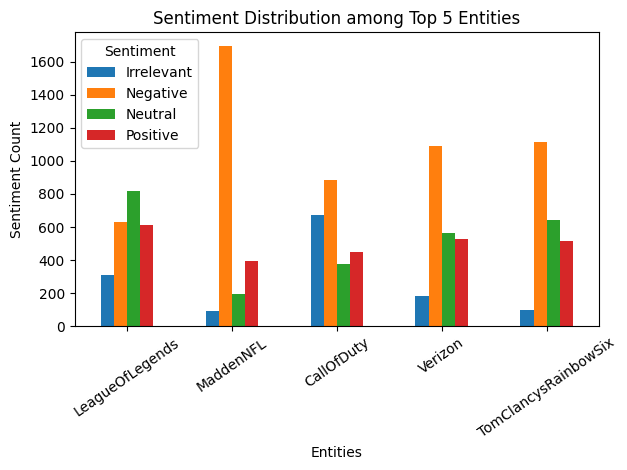

In [17]:
sentiment_counts = new_df.groupby(['Entity', 'Sentiments']).size().unstack(fill_value=0)
entity_sentiment_counts = sentiment_counts.groupby('Entity').sum()
entity_total_sentiments = entity_sentiment_counts.sum(axis=1)
top5_entities = entity_total_sentiments.nlargest(5).index
top5_entity_sentiments = entity_sentiment_counts.loc[top5_entities]
plt.figure(figsize=(20,16))
top5_entity_sentiments.plot(kind='bar')
plt.xlabel('Entities')
plt.ylabel('Sentiment Count')
plt.title('Sentiment Distribution among Top 5 Entities')
plt.legend(title='Sentiment')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

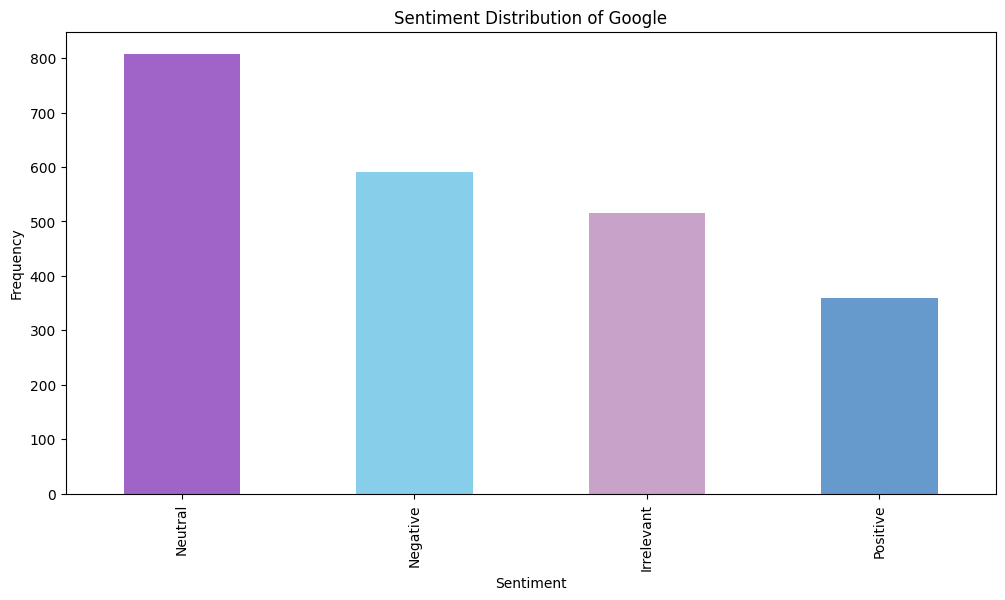

In [23]:
entity_data = new_df[new_df['Entity'] == 'Google']
sentiment_counts = entity_data['Sentiments'].value_counts()
plt.figure(figsize=(12, 6))
sentiment_counts.plot(kind='bar', color=['#A064C9', '#87CEEB', '#C8A2C8','#6699CC'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution of Google')
plt.show()

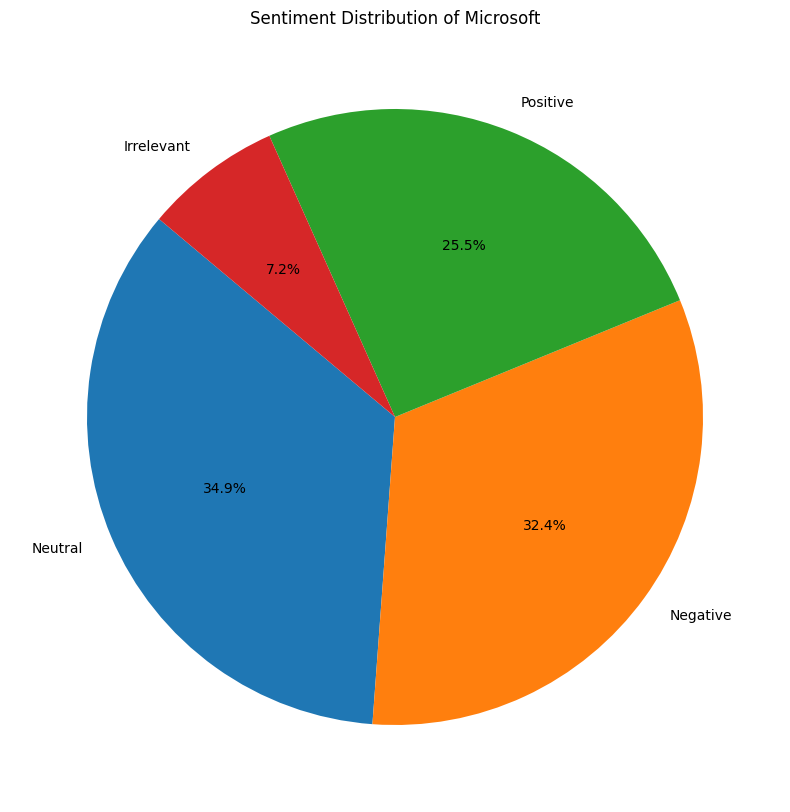

In [22]:
entity_data = new_df[new_df['Entity'] == 'Microsoft']
sentiment_counts = entity_data['Sentiments'].value_counts()
plt.figure(figsize=(10, 10))
labels = sentiment_counts.index  # Labels for pie chart segments
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Microsoft')
plt.show()